# **Consumer Feedback Categorization**

# AI 351 Project
# Reiaan Mazhar
# 2022502

**Loading Dataset**

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
from textblob import TextBlob

In [2]:
# the dataset is large so uploaded to google drive.
# so mount google drive in colab so it can access it from there

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# providing path in drive

data = pd.read_csv("/content/drive/MyDrive/consumercomplaints.csv")

In [4]:
print(data.head())

   Unnamed: 0 Date received  \
0           0    2022-11-11   
1           1    2022-11-23   
2           2    2022-11-16   
3           3    2022-11-15   
4           4    2022-11-07   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2                                           Mortgage   
3                        Checking or savings account   
4                                           Mortgage   

                  Sub-product                           Issue  \
0  Conventional home mortgage  Trouble during payment process   
1            Credit reporting     Improper use of your report   
2                 VA mortgage  Trouble during payment process   
3            Checking account             Managing an account   
4      Other type of mortgage  Trouble during payment process   

                                       Sub-issue  \
0                                

**Exploratory Data Analysis**

In [5]:
# The dataset contains an Unnamed column so, I’ll remove the column

data = data.drop("Unnamed: 0",axis=1)

In [6]:
# cheking if the dataset contains null values

print(data.isnull().sum())

Date received                         0
Product                               0
Sub-product                      235294
Issue                                 0
Sub-issue                        683355
Consumer complaint narrative    1987977
dtype: int64


In [7]:
# The dataset contains many null values so drop all the rows containing null values

data = data.dropna()

In [8]:
# The product column in the dataset contains the labels.
# Here the labels represent the nature of the complaints reported by the consumers.
# checking frequency of each label

print(data["Product"].value_counts())

Product
Credit reporting, credit repair services, or other personal consumer reports    507582
Debt collection                                                                 192045
Credit card or prepaid card                                                      80410
Checking or savings account                                                      54192
Student loan                                                                     32697
Vehicle loan or lease                                                            19874
Payday loan, title loan, or personal loan                                         1008
Name: count, dtype: int64


In [10]:
# Provided data
data_dict = {
    "Credit reporting, credit repair services, or other personal consumer reports": 507582,
    "Debt collection": 192045,
    "Credit card or prepaid card": 80410,
    "Checking or savings account": 54192,
    "Student loan": 32697,
    "Vehicle loan or lease": 19874,
    "Payday loan, title loan, or personal loan": 1008,
}


In [11]:
# Convert to a DataFrame for better handling
scaled_data = pd.Series(data_dict).sort_values(ascending=True)


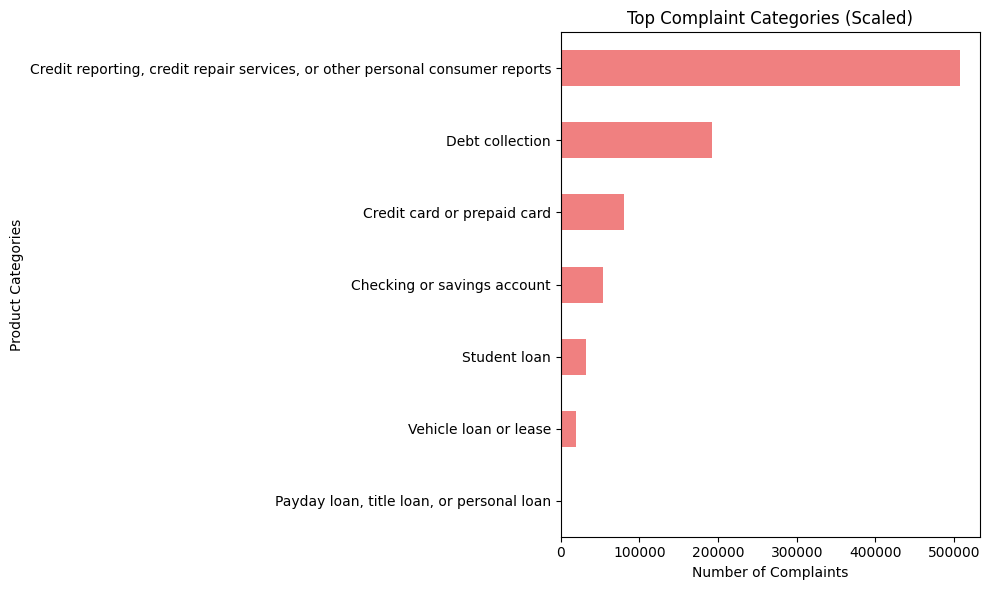

In [12]:
# Horizontal bar chart for top complaint categories
plt.figure(figsize=(10, 6))
scaled_data.plot(kind='barh', color='lightcoral')
plt.xlabel("Number of Complaints")
plt.ylabel("Product Categories")
plt.title("Top Complaint Categories (Scaled)")
plt.tight_layout()
plt.show()

**NLP Text Preprocessing**

In [9]:
# nlp text preprocessing. cleaning, removing stopwords, and stemming the words

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Consumer complaint narrative"] = data["Consumer complaint narrative"].apply(clean)

**Model Training**

In [ ]:
# Preparing data
# split the data into training and test sets
data = data[["Consumer complaint narrative", "Product"]]
x = np.array(data["Consumer complaint narrative"])
y = np.array(data["Product"])

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# SGD Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

SGDClassifier()

In [ ]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Function to handle real-time predictions and feedback
def real_time_feedback(models, vectorizer):
    for model_name, model in models.items():
        print(f"\n--- Real-Time Prediction for {model_name} ---")
        user_input = input("Enter a Text: ")
        data = vectorizer.transform([user_input]).toarray()
        prediction = model.predict(data)
        print(f"Predicted Product Category: {prediction[0]}")

        user_feedback = input("Is this correct? (yes/no): ").lower()
        if user_feedback == 'no':
            correct_category = input("Enter the correct category: ")
            print(f"Feedback recorded: {correct_category}")
        else:
            print("Thank you for confirming!")

**Model Testing**



In [ ]:
# Dictionary of models
models = {
    "SGD Classifier": sgd_model,
    "Naive Bayes": nb_model
}

In [ ]:
# Real-time feedback for all models
real_time_feedback(models, cv)


--- Real-Time Prediction for SGD Classifier ---
Enter a Text: On XXXX/XXXX/2022, I called Citi XXXX XXXX XXXX XXXX XXXX Customer Service at XXXX. I did not want to pay {$99.00} for the next year membership and wanted to cancel my card account. A customer service representative told me if I pay the {$99.00} membership fee and spending {$1000.00} in 3 months, I can get XXXX mileage reward points of XXXX XXXX. I believed what he said and paid {$99.00} membership fee on XXXX/XXXX/2022.   I spent more than {$1000.00} in 3 months since XXXX/XXXX/2022. On XXXX/XXXX/2022, I called the card Customer Service about my reward mileage points. I was total the reward mileage points are NOT XXXX. I can only get XXXX mileage points instead. I believe that the Citi XXXX XXXX XXXX XXXX XXXX Customer Service cheated me. This is business fraud!
Predicted Product Category: Credit card or prepaid card
Is this correct? (yes/no): yes
Thank you for confirming!

--- Real-Time Prediction for Naive Bayes ---
Ente


SGD Classifier Accuracy: 0.8504353584069739
SGD Classifier Classification Report:
                                                                               precision    recall  f1-score   support

                                                 Checking or savings account       0.88      0.80      0.84     17766
                                                 Credit card or prepaid card       0.83      0.72      0.77     26332
Credit reporting, credit repair services, or other personal consumer reports       0.85      0.96      0.90    167824
                                                             Debt collection       0.86      0.71      0.78     63496
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00       328
                                                                Student loan       0.90      0.73      0.81     10581
                                                       Vehicle loan or lease       0.81  

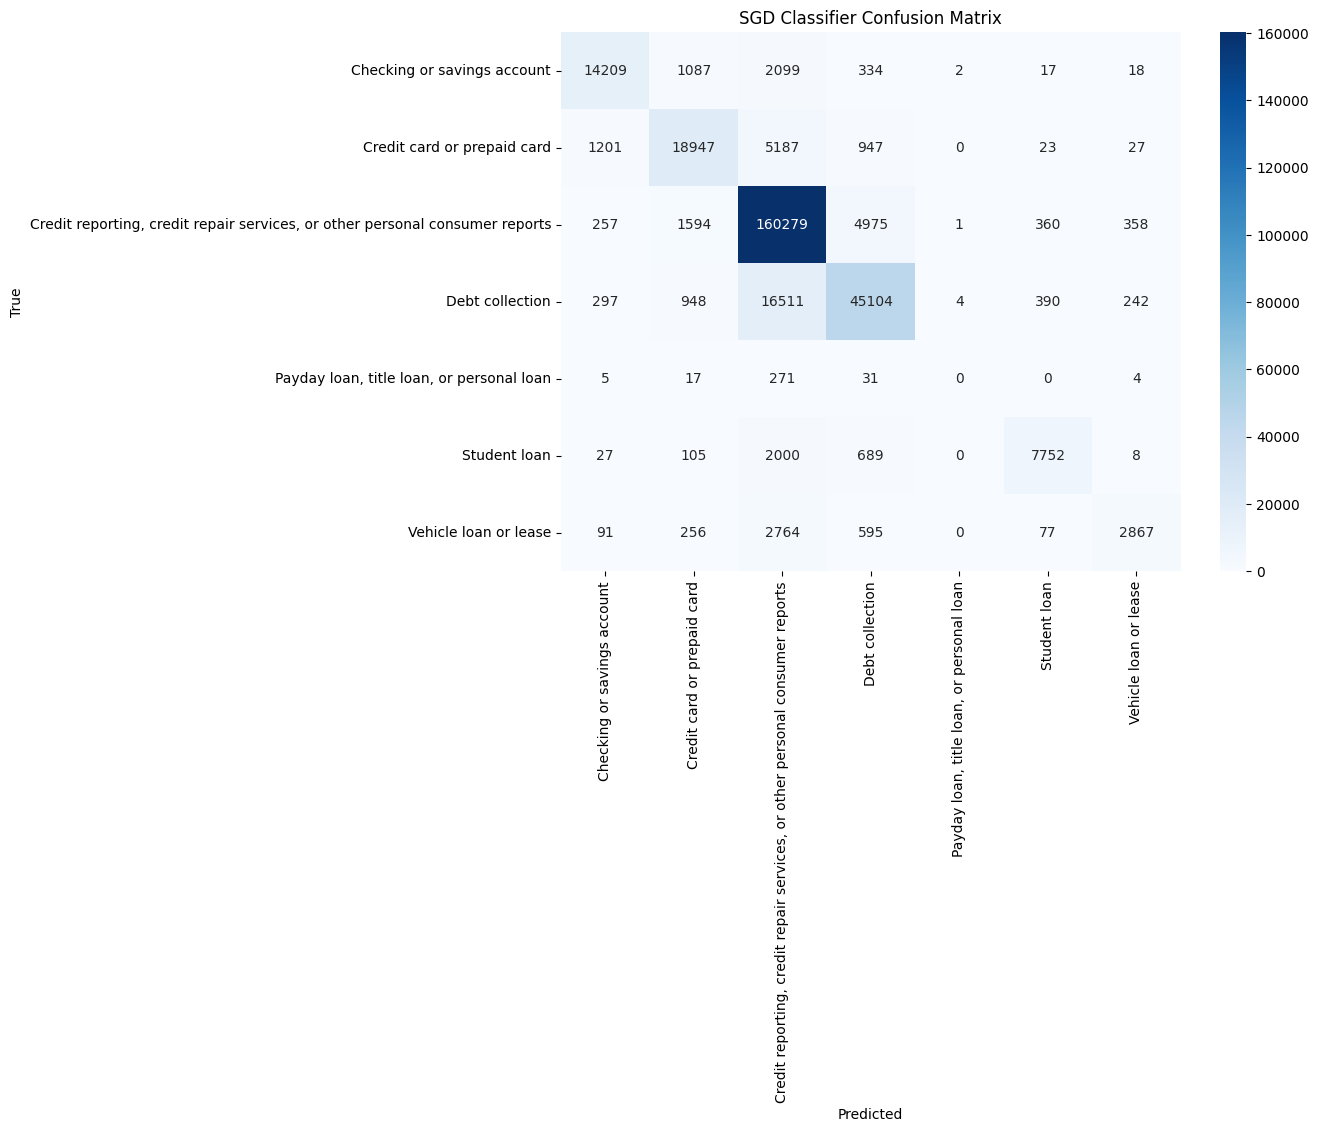


Naive Bayes Accuracy: 0.8172006676291995
Naive Bayes Classification Report:
                                                                               precision    recall  f1-score   support

                                                 Checking or savings account       0.77      0.88      0.82     17766
                                                 Credit card or prepaid card       0.63      0.79      0.70     26332
Credit reporting, credit repair services, or other personal consumer reports       0.91      0.84      0.88    167824
                                                             Debt collection       0.78      0.74      0.76     63496
                                   Payday loan, title loan, or personal loan       0.00      0.00      0.00       328
                                                                Student loan       0.66      0.90      0.76     10581
                                                       Vehicle loan or lease       0.49      0.

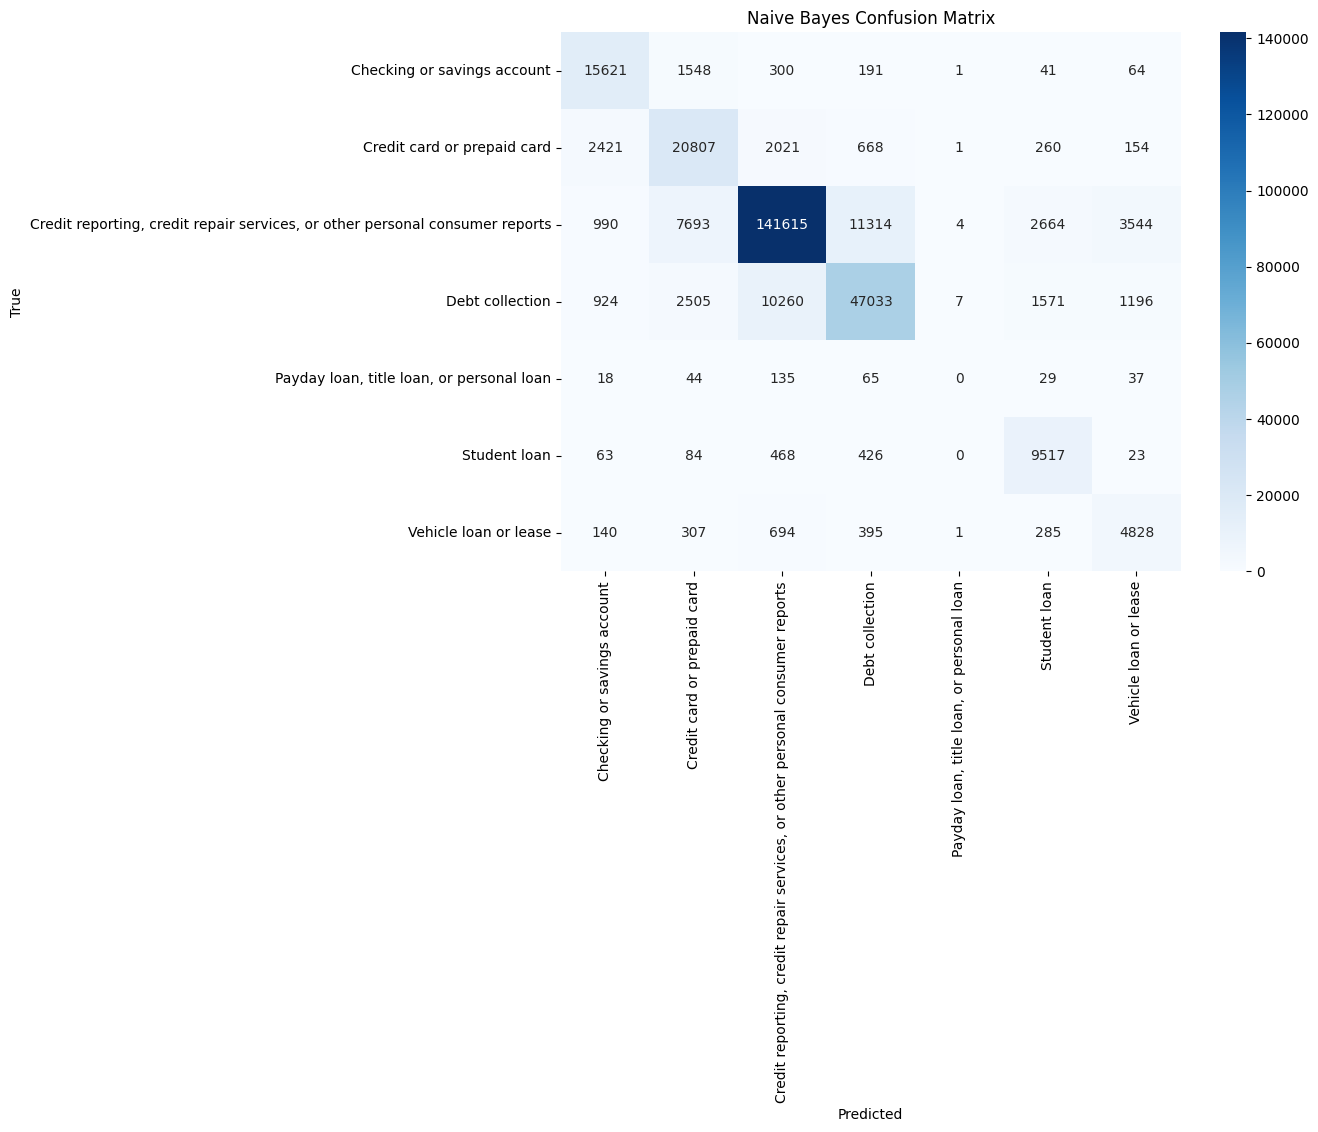

In [ ]:
# Evaluate all models
for model_name, model in models.items():
    print(f"\n{model_name} Accuracy:", accuracy_score(y_test, model.predict(X_test)))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, model.predict(X_test)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()